In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import pingouin as pg
plt.style.use('fast')
plt.style.use('/home/kdriessen/gh_master/kdephys/kdephys/plot/acr_plots.mplstyle')

/home/kdriessen/miniconda3/envs/acr/lib/python3.11/site-packages/outdated/utils.py:14: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
figs = './plots'

In [3]:
molecular_data_path = '/Volumes/opto_loc/Data/ACR_PROJECT_MATERIALS/molecular_results.xlsx'
data = pd.read_excel(molecular_data_path)

/home/kdriessen/miniconda3/envs/acr/lib/python3.11/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [4]:
# Step 1: Group by subject
grouped = data.groupby('Subject')

# Step 2 & 3: Normalize the pGluA1 values by the contralateral hemisphere
data['normalized_pGluA1'] = data.apply(lambda row: row['pGluA1'] / grouped.get_group(row['Subject']).query("Hemisphere == 'Contralateral'")['pGluA1'].values[0], axis=1)

<Axes: xlabel='Condition', ylabel='normalized_pGluA1'>

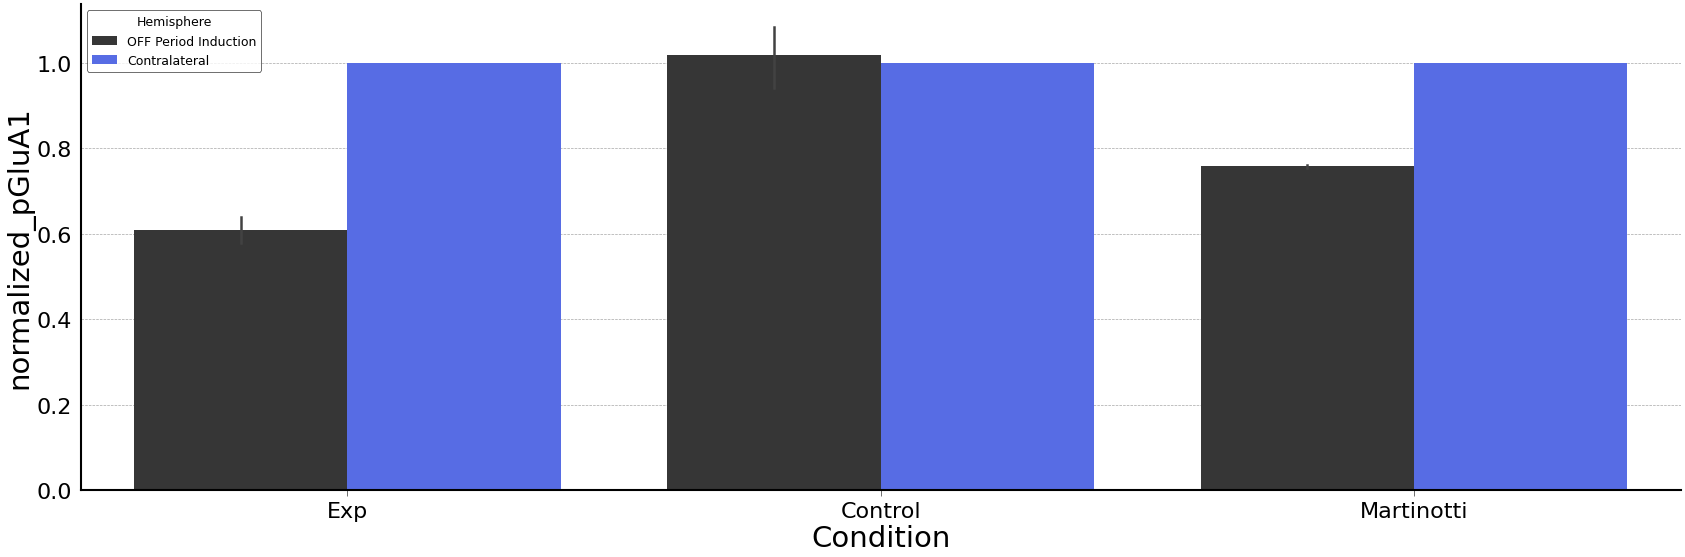

In [5]:
sns.barplot(x='Condition', y='normalized_pGluA1', hue='Hemisphere', data=data)

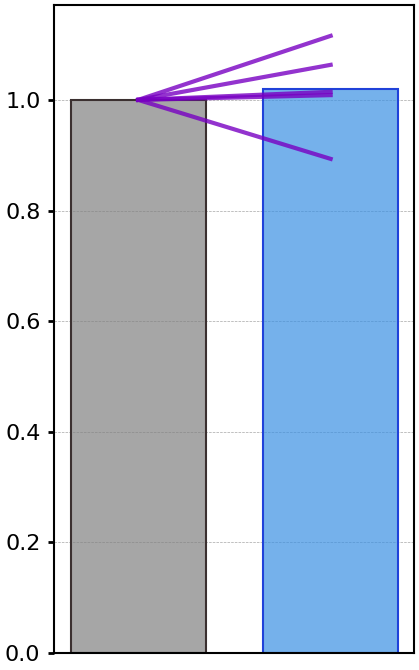

In [17]:
plt.style.use('fast')
plt.style.use('/home/kdriessen/gh_master/kdephys/kdephys/plot/acr_plots.mplstyle')

data = data.sort_values(by='Hemisphere', ascending=True)

f, ax = plt.subplots(1, 1, figsize=(9, 16), sharey=True)

# Controls
sns.barplot(
            data=data.loc[data.Condition == 'Control'].loc[data.Hemisphere == 'Contralateral'], 
            x='Hemisphere', 
            y='normalized_pGluA1', 
            order=['Contralateral', 'OFF Period Induction'], 
            palette=['gray', 'dodgerblue'], 
            errorbar=None, 
            ax=ax, 
            edgecolor='#3b3030',
            width=0.7)

sns.barplot(
            data=data.loc[data.Condition == 'Control'].loc[data.Hemisphere == 'OFF Period Induction'], 
            x='Hemisphere', 
            y='normalized_pGluA1', 
            order=['Contralateral', 'OFF Period Induction'], 
            palette=['gray', 'dodgerblue'], 
            errorbar=None, 
            ax=ax, 
            edgecolor='#2042d9',
            width=0.7)

#sns.boxplot(data=data.loc[data.Condition == 'Control'], x='Hemisphere', y='normalized_pGluA1', order=['Contralateral', 'OFF Period Induction'], palette=['gray', 'dodgerblue'], showfliers=False, ax=ax)
for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .7))
    #patch.set_edgecolor((r, g, b, 1))
    patch.set_linewidth(3)

#sns.swarmplot(data=data.loc[data.Condition == 'Control'], x='Hemisphere', y='normalized_pGluA1', order=['Contralateral', 'OFF Period Induction'], palette=['#e7dede', '#123aff'], marker='o', size=10, ax=ax)
sns.lineplot(data=data.loc[data.Condition == 'Control'], x='Hemisphere', y='normalized_pGluA1', units='Subject', estimator=None, color='#7800c2', ax=ax, linewidth=6, alpha=0.8)


#ax.set_xticklabels(['Contralateral Control', 'OFF Period Induction'])
ax.set_xticklabels('')
ax.set_xlabel('')
#ax.set_title('OFF-Induction', fontsize=24)
ax.set_ylabel('')
#ax.yaxis.set_tick_params(labelsize=16)
f.savefig(os.path.join(figs, 'pGluA1_normalized_control.png'), dpi=300, bbox_inches='tight')


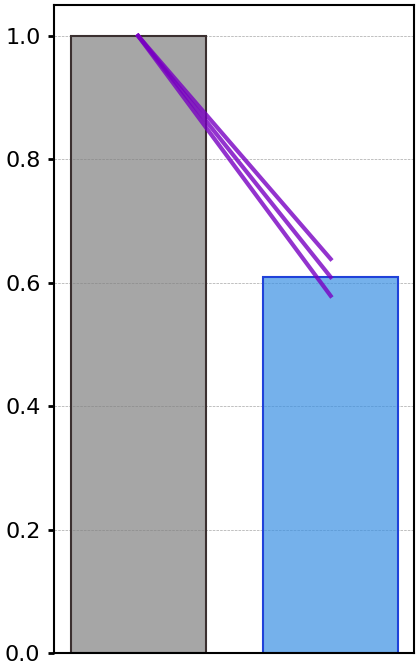

In [15]:
plt.style.use('fast')
plt.style.use('/home/kdriessen/gh_master/kdephys/kdephys/plot/acr_plots.mplstyle')

data = data.sort_values(by='Hemisphere', ascending=True)

f, ax = plt.subplots(1, 1, figsize=(9, 16), sharey=True)

# Exps
sns.barplot(
            data=data.loc[data.Condition == 'Exp'].loc[data.Hemisphere == 'Contralateral'], 
            x='Hemisphere', 
            y='normalized_pGluA1', 
            order=['Contralateral', 'OFF Period Induction'], 
            palette=['gray', 'dodgerblue'], 
            errorbar=None, 
            ax=ax, 
            edgecolor='#3b3030',
            width=0.7)

sns.barplot(
            data=data.loc[data.Condition == 'Exp'].loc[data.Hemisphere == 'OFF Period Induction'], 
            x='Hemisphere', 
            y='normalized_pGluA1', 
            order=['Contralateral', 'OFF Period Induction'], 
            palette=['gray', 'dodgerblue'], 
            errorbar=None, 
            ax=ax, 
            edgecolor='#2042d9',
            width=0.7)

#sns.boxplot(data=data.loc[data.Condition == 'Exp'], x='Hemisphere', y='normalized_pGluA1', order=['Contralateral', 'OFF Period Induction'], palette=['gray', 'dodgerblue'], showfliers=False, ax=ax)
for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .7))
    #patch.set_edgecolor((r, g, b, 1))
    patch.set_linewidth(3)

#sns.swarmplot(data=data.loc[data.Condition == 'Exp'], x='Hemisphere', y='normalized_pGluA1', order=['Contralateral', 'OFF Period Induction'], palette=['#e7dede', '#123aff'], marker='o', size=10, ax=ax)
sns.lineplot(data=data.loc[data.Condition == 'Exp'], x='Hemisphere', y='normalized_pGluA1', units='Subject', estimator=None, color='#7800c2', ax=ax, linewidth=6, alpha=0.8)


#ax.set_xticklabels(['Contralateral Exp', 'OFF Period Induction'])
ax.set_xticklabels('')
ax.set_xlabel('')
#ax.set_title('OFF-Induction', fontsize=24)
ax.set_ylabel('')
#ax.yaxis.set_tick_params(labelsize=16)
f.savefig(os.path.join(figs, 'pGluA1_normalized_ACR.png'), dpi=300, bbox_inches='tight')


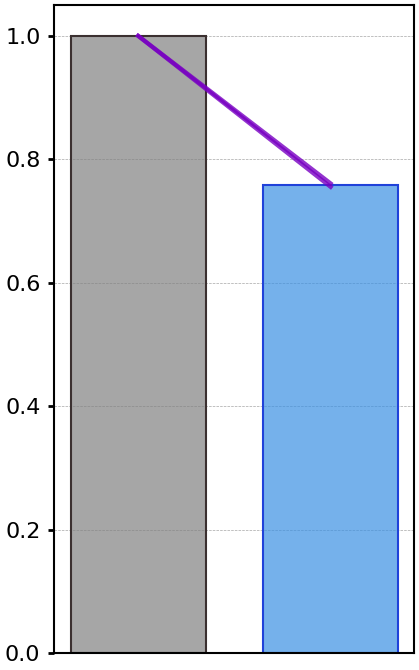

In [16]:
plt.style.use('fast')
plt.style.use('/home/kdriessen/gh_master/kdephys/kdephys/plot/acr_plots.mplstyle')

data = data.sort_values(by='Hemisphere', ascending=True)

f, ax = plt.subplots(1, 1, figsize=(9, 16), sharey=True)

# Martinottis
sns.barplot(
            data=data.loc[data.Condition == 'Martinotti'].loc[data.Hemisphere == 'Contralateral'], 
            x='Hemisphere', 
            y='normalized_pGluA1', 
            order=['Contralateral', 'OFF Period Induction'], 
            palette=['gray', 'dodgerblue'], 
            errorbar=None, 
            ax=ax, 
            edgecolor='#3b3030',
            width=0.7)

sns.barplot(
            data=data.loc[data.Condition == 'Martinotti'].loc[data.Hemisphere == 'OFF Period Induction'], 
            x='Hemisphere', 
            y='normalized_pGluA1', 
            order=['Contralateral', 'OFF Period Induction'], 
            palette=['gray', 'dodgerblue'], 
            errorbar=None, 
            ax=ax, 
            edgecolor='#2042d9',
            width=0.7)

#sns.boxplot(data=data.loc[data.Condition == 'Martinotti'], x='Hemisphere', y='normalized_pGluA1', order=['Contralateral', 'OFF Period Induction'], palette=['gray', 'dodgerblue'], showfliers=False, ax=ax)
for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .7))
    #patch.set_edgecolor((r, g, b, 1))
    patch.set_linewidth(3)

#sns.swarmplot(data=data.loc[data.Condition == 'Martinotti'], x='Hemisphere', y='normalized_pGluA1', order=['Contralateral', 'OFF Period Induction'], palette=['#e7dede', '#123aff'], marker='o', size=10, ax=ax)
sns.lineplot(data=data.loc[data.Condition == 'Martinotti'], x='Hemisphere', y='normalized_pGluA1', units='Subject', estimator=None, color='#7800c2', ax=ax, linewidth=6, alpha=0.8)


#ax.set_xticklabels(['Contralateral Martinotti', 'OFF Period Induction'])
ax.set_xticklabels('')
ax.set_xlabel('')
#ax.set_title('OFF-Induction', fontsize=24)
ax.set_ylabel('')
#ax.yaxis.set_tick_params(labelsize=16)
f.savefig(os.path.join(figs, 'pGluA1_normalized_Martinotti.png'), dpi=300, bbox_inches='tight')

# Stats

In [49]:
# Controls
contra_vals = data.loc[data.Condition=='Control'].loc[data.Hemisphere=='Contralateral']['pGluA1'].values
treated_vals = data.loc[data.Condition=='Control'].loc[data.Hemisphere=='OFF Period Induction']['pGluA1'].values
pg.ttest(contra_vals, treated_vals, paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.236407,4,two-sided,0.824729,"[-0.12, 0.1]",0.055314,0.407,0.051087


In [50]:
# ACR
contra_vals = data.loc[data.Condition=='Exp'].loc[data.Hemisphere=='Contralateral']['pGluA1'].values
treated_vals = data.loc[data.Condition=='Exp'].loc[data.Hemisphere=='OFF Period Induction']['pGluA1'].values
pg.ttest(contra_vals, treated_vals, paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,12.130386,2,two-sided,0.006727,"[0.18, 0.38]",2.410848,7.895,0.593969


In [51]:
# Somatostatin
contra_vals = data.loc[data.Condition=='Martinotti'].loc[data.Hemisphere=='Contralateral']['pGluA1'].values
treated_vals = data.loc[data.Condition=='Martinotti'].loc[data.Hemisphere=='OFF Period Induction']['pGluA1'].values
pg.ttest(contra_vals, treated_vals, paired=True)

/home/kdriessen/miniconda3/envs/acr/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:7321: RuntimeWarning: divide by zero encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/home/kdriessen/miniconda3/envs/acr/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:7313: RuntimeWarning: divide by zero encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,15.938713,1,two-sided,0.039889,"[0.06, 0.57]",3.871061,2.568,0.332459
